![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

# #02 | Why gender was the most important factor to survive the Titanic

![](src/tree.jpg)

Learn how to develop a Decision Tree Classifier in Python to understand why gender was the most important factor to survive the Titanic accident.

## Introduction to Supervised Classification Models

Machine Learning is a field that focuses on [**getting a mathematical equation**](https://twitter.com/sotastica/status/1449735653328031745) to make predictions about the future. Although not all Machine Learning models work the same way.

Which types of Machine Learning models can we distinguish so far?

- **Classifiers** to predict **Categorical Variables**
- **Regressors** to predict **Numerical Variables**

The previous chapter covered the explanation of a Regressor model: the Linear Regression.

This chapter covers the explanation of a Classification model: the Decision Tree.

Why do they belong to Machine Learning?

- The Machine wants to get the best numbers of a mathematical equation such that **the difference between reality and predictions is minimum**:

    - **Classifier** evaluates the model based on **prediction success rate**
        $$
        y \stackrel{?}{=} \hat y
        $$
    - **Regressor** evaluates the model based on the **distance between real data and predictions** (residuals) 
        $$
        y - \hat y
        $$

There are many Machine Learning Models of each type.

You don't need to know the process behind each model because they all work the same way (see article). In the end, you will choose the one makes better predictions.

This tutorial will show you how to develop a Decision Tree to calculate the probability of a person to survive the Titanic and the different evaluation metrics we can calculate on Classification Models.

**Table of Important Content**

1. 🛀 [How to preprocess/clean the data to fit a Machine Learning model?](#Data-Preprocessing)
    - Dummy Variables
    - Missing Data
2. 🤩 [How to **visualize** a Decision Tree model in Python step by step?](#Model-Visualization)
3. 🤔 [How to **interpret** the nodes and leafs values of a Decision Tree plot?](#Model-Interpretation)
4. ⚠️ How to **evaluate** Classification models?
    - [Accuracy](#Model's-Score)
    - [Confussion Matrix](#The-Confusion-Matrix-to-compute-Other-Classification-Metrics)
        - Sensitivity
        - Specificity
        - ROC Curve
5. 🏁 [How to compare Classification models to choose the best one?](#Which-One-Is-the-Best-Model?-Why?)

## [ ] Load the Data

- This dataset represents **people** (rows) aboard the Titanic
- And their **sociological characteristics** (columns)

In [ ]:
pd.get_dummies

In [1]:
import seaborn as sns #!
import pandas as pd

df_titanic = sns.load_dataset(name='titanic')[['survived', 'sex', 'age', 'embarked', 'class']]
df_titanic

,survived,sex,age,embarked,class
0,0,male,22.0,S,Third
1,1,female,38.0,C,First
2,1,female,26.0,S,Third
3,1,female,35.0,S,First
4,0,male,35.0,S,Third
...,...,...,...,...,...
886,0,male,27.0,S,Second
887,1,female,19.0,S,First
888,0,female,NaN,S,Third
889,1,male,26.0,C,First


## How do we compute a Decision Tree Model in Python?

### Import the Class

In [2]:
from sklearn.tree import DecisionTreeClassifier

### Instantiante the Class

In [3]:
model_DecTree =DecisionTreeClassifier(max_depth=3)

### Access the Function

In [4]:
model_DecTree.fit()

TypeError: DecisionTreeClassifier.fit() missing 2 required positional arguments: 'X' and 'y'

### Separate the Variables

In [ ]:
target = df_titanic.survived

In [ ]:
feature = df_titanic.drop(columns='survived')

### Fit the Model

In [ ]:
model_DecTree.fit(X= feature, y= target)

## [ ] Data Preprocessing

In [ ]:
df_titanic

### Dummy Variables

In [13]:
df_titanic = pd.get_dummies(data=df_titanic, drop_first=True)

**Fit the Model Again**

In [14]:
target= df_titanic.survived

In [15]:
feature = df_titanic.drop(columns='survived')

In [16]:
model_DecTree.fit(X=feature,y=target)

DecisionTreeClassifier(max_depth=3)

### Missing Data

In [17]:
df_titanic= df_titanic.dropna().reset_index(drop=True)

**Fit the Model Again**

In [18]:
target = df_titanic.survived


In [19]:
feature = df_titanic.drop(columns='survived')

In [20]:
model_DecTree.fit(X=feature,y=target)

DecisionTreeClassifier(max_depth=3)

#### Calculate Predictions

In [49]:
model_DecTree.predict_proba(X=feature)[:,1];


In [26]:
df_pred =df_titanic[['survived']].copy()

In [29]:
df_pred['pred_prob_dt'] = model_DecTree.predict_proba(X=feature)[:,1];

In [30]:
df_pred

,survived,pred_prob_dt
0,0,0.207101
1,1,0.948387
2,1,0.511111
3,1,0.948387
4,0,0.207101
...,...,...
707,0,0.083333
708,0,0.076923
709,1,0.948387
710,1,0.207101


In [39]:
df_pred.pred_prob_dt > 0.5;

In [32]:
import numpy as np

In [34]:
df_pred['pred_dt'] = np.where(df_pred.pred_prob_dt >0.5, 1, 0)

In [35]:
from sklearn.tree import plot_tree

In [36]:
feature.columns

Index(['age', 'sex_male', 'embarked_Q', 'embarked_S', 'class_Second',
       'class_Third'],
      dtype='object')

In [37]:
import matplotlib.pyplot as plt

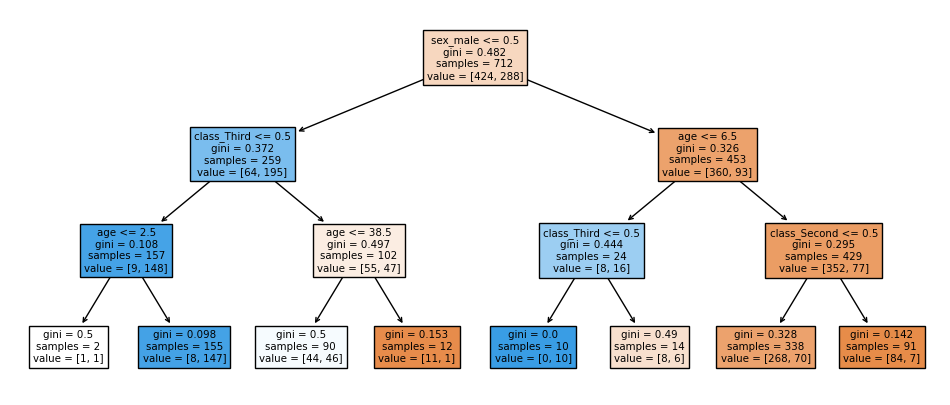

In [51]:
plt.figure(figsize=(12,5))
plot_tree(decision_tree=model_DecTree, feature_names=feature.columns, filled=True);

### [ ] Model Interpretation

In [40]:
df_titanic[:1]

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third,pred_dt
0,0,22.0,1,0,1,0,1,0


In [41]:
feature[:1]

,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,22.0,1,0,1,0,1


In [42]:
model_DecTree.predict_proba(feature[:1])

array([[0.79289941, 0.20710059]])

In [45]:
268/338

0.7928994082840237

### [ ] Model's Score

#### Calculate the Score

In [55]:
model_DecTree.score(X=feature,y=target)

0.8075842696629213

#### The Score Step-by-step

In [65]:
model_DecTree.predict_proba(X=feature);

In [64]:
df_titanic[['survived']];

In [58]:
df_pred

,survived,pred_prob_dt,pred_dt
0,0,0.207101,0
1,1,0.948387,1
2,1,0.511111,1
3,1,0.948387,1
4,0,0.207101,0
...,...,...,...
707,0,0.083333,0
708,0,0.076923,0
709,1,0.948387,1
710,1,0.207101,0


In [60]:
comp = df_pred.survived == df_pred.pred_dt

In [61]:
comp.sum()

575

In [63]:
575/712

0.8075842696629213

### [ ] The Confusion Matrix to Compute Other Classification Metrics

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [67]:
df_pred

,survived,pred_prob_dt,pred_dt
0,0,0.207101,0
1,1,0.948387,1
2,1,0.511111,1
3,1,0.948387,1
4,0,0.207101,0
...,...,...,...
707,0,0.083333,0
708,0,0.076923,0
709,1,0.948387,1
710,1,0.207101,0


In [71]:
cm = confusion_matrix(y_true=df_pred.survived, y_pred=df_pred.pred_dt)

In [75]:
CM = ConfusionMatrixDisplay(cm)

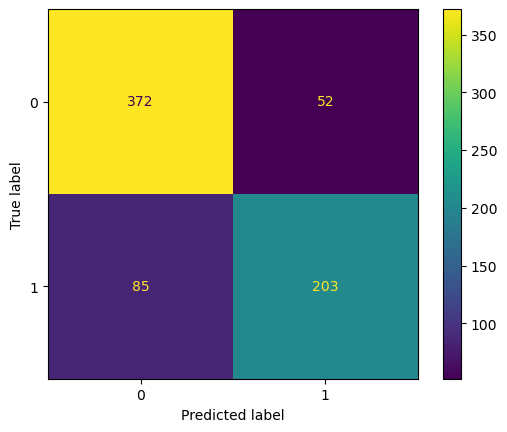

In [76]:
CM.plot()

#### Specificity (Recall=0)

In [77]:
372/(372+52)

0.8773584905660378

#### Sensitivity (Recall=1)

In [78]:
203/(203+85)

0.7048611111111112

#### Classification Report

In [79]:
from sklearn.metrics import classification_report


In [81]:
report = classification_report(y_true=df_pred.survived, y_pred=df_pred.pred_dt)

In [82]:
print(report)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       424
           1       0.80      0.70      0.75       288

    accuracy                           0.81       712
   macro avg       0.81      0.79      0.80       712
weighted avg       0.81      0.81      0.81       712



#### [ ] ROC Curve

In [54]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/4jRBRDbJemM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [84]:
df_pred

,survived,pred_prob_dt,pred_dt
0,0,0.207101,0
1,1,0.948387,1
2,1,0.511111,1
3,1,0.948387,1
4,0,0.207101,0
...,...,...,...
707,0,0.083333,0
708,0,0.076923,0
709,1,0.948387,1
710,1,0.207101,0


In [83]:
from sklearn.metrics import roc_curve

In [ ]:
roc_curve(y_true=df_pred.survived, y_score=)

In [85]:
from sklearn.metrics import RocCurveDisplay

In [86]:
auc = RocCurveDisplay()

TypeError: RocCurveDisplay.__init__() missing 2 required keyword-only arguments: 'fpr' and 'tpr'

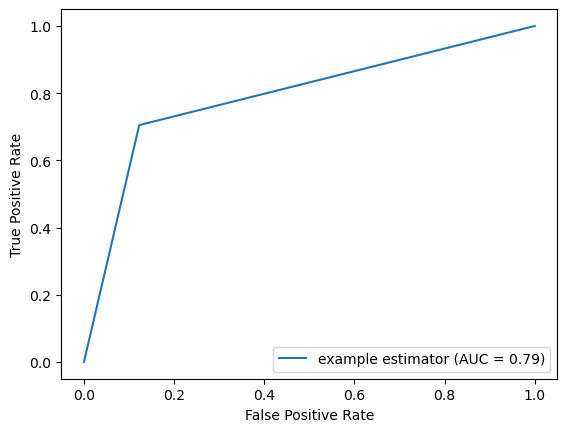

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
y = df_pred.survived
pred = df_pred.pred_dt
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()

## [ ] Other Classification Models

### `RandomForestClassifier()` in Python

#### Fit the Model

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
model_rfc = RandomForestClassifier()

In [91]:
model_rfc.fit(X=feature,y= target)

RandomForestClassifier()

#### Calculate Predictions

In [97]:
df_pred

,survived,pred_prob_dt,pred_dt
0,0,0.207101,0
1,1,0.948387,1
2,1,0.511111,1
3,1,0.948387,1
4,0,0.207101,0
...,...,...,...
707,0,0.083333,0
708,0,0.076923,0
709,1,0.948387,1
710,1,0.207101,0


In [113]:
pred_rfc = model_rfc.predict(X=feature)

In [115]:
df_pred['pred_rfc'] = pred_rfc

#### Model's Score

### `SVC()` in Python

#### Fit the Model

#### Calculate Predictions

#### Model's Score

## Which One Is the Best Model? Why?

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.